In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [7]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
x_train=train_datagen.flow_from_directory(r"D:\New folder\Hand Gesture\Dataset\training_set",target_size=(64,64),
                                          class_mode="categorical",batch_size=30)

Found 15750 images belonging to 9 classes.


In [9]:
x_test=test_datagen.flow_from_directory(r"D:\New folder\Hand Gesture\Dataset\test_set",target_size=(64,64),
                                                            class_mode="categorical",batch_size=30)

Found 2250 images belonging to 9 classes.


In [10]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [11]:
model=Sequential()

In [12]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(200,activation='relu'))

In [16]:
model.add(Dense(9,activation="softmax"))

In [17]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [18]:
len(x_train)

525

In [19]:
len(x_test)

75

In [20]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [21]:
model.fit(x_train,epochs=1,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

525/525 [==============================] - 74s 140ms/step - loss: 0.2635 - accuracy: 0.9117 - val_loss: 0.1682 - val_accuracy: 0.9578


In [22]:
model.save('Model.h5')

In [23]:
from keras.models import load_model
import numpy as np
import h5py
import cv2

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [25]:
model = load_model('Model.h5')

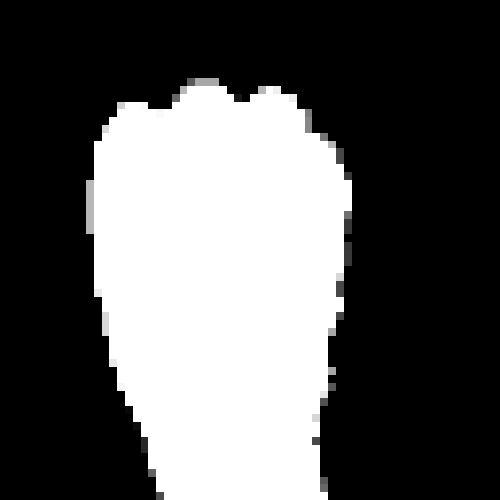

In [26]:
img =image.load_img(r"D:\New folder\Hand Gesture\Dataset\test_set\E\3.png",target_size = (500,500))
img

In [27]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [28]:
from skimage.transform import resize
def detect(frame):
    img=resize(frame,(64,64,1))
    img=np.expand_dims(img,axis=0)
    if(np.max(img)>1):
        img=img/255.0
        prediction=model.predict(img)
        print(prediction)
        prediction=model.predict_classes(img)
        print(prediction)

In [29]:
x= image.img_to_array(img)

In [30]:
frame=cv2.imread(r"D:\New folder\Hand Gesture\Dataset\test_set\E\3.png")
data=detect(frame)

In [31]:
cv2.imshow("frame",frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('Model.h5')
video=cv2.VideoCapture(0)
index=['A','B','C','D','E','F','G','H','I']
while 1:
    succes,frame=video.read()
    cv2.imwrite('image.jpg',frame)
    img=image.load_img('image.jpg',target_size=(64,64))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=np.argmax(model.predict(x),axis=1)
    y=pred[0]
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620,400), (255,0,0), 5)
    cv2.putText(frame,'The Predicted Alphabet is: '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 32ms/step
